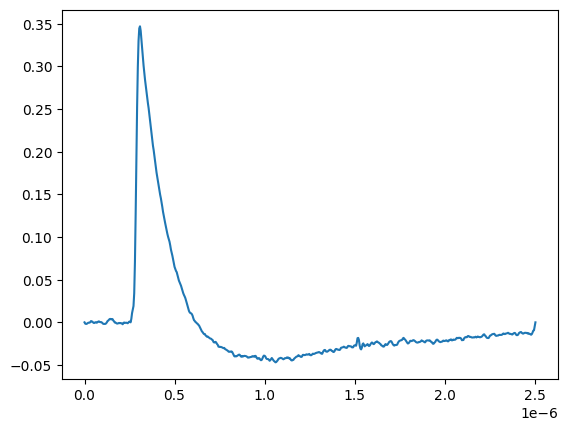

In [1]:
import numpy as np
import matplotlib.pyplot as plt

RUN = np.loadtxt("../data/raw/SPE_maritza.txt")
RUN_X = 4e-9*np.arange(len(RUN))
plt.plot(RUN_X,RUN)

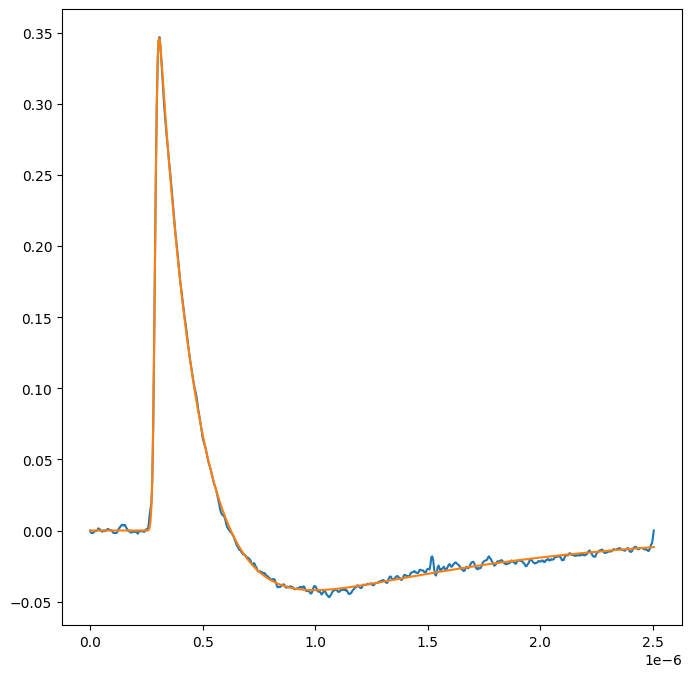

In [2]:
import sys
sys.path.insert(0, '../')

from lib.fit_functions import sc_fit

RANGES = [0,0]
OPT = {}

fit = sc_fit(RUN,RUN_X,RANGES,OPT)
plt.plot(RUN_X,RUN,label="RAW")
plt.plot(RUN_X,fit,label="FIT")

In [6]:
from lib.dec_functions import deconvolve

my_run = dict()
my_run["N_runs"] = [0]
my_run["N_channels"] = [0]
my_run[0] = dict()
my_run[0][0] = dict()
my_run[0][0]["ADC"] = RUN

OPT = {
    "TRIMM": 1,
    "AUTO_TRIMM": True,
    "WIENER_BUFFER": 100,
    "SHOW": False,
    "SINGLE": True        
}

dec = deconvolve(my_run,fit,OPT)

%matplotlib qt
plt.plot(RUN_X,RUN,label="RAW")
plt.plot(RUN_X,fit,label="FIT")
plt.plot(4e-9*np.arange(len(dec)),dec,label="DEC")
plt.legend()

Events have not been processed
Saved data in: ../data/dec/Deconvolution_run00_ch0.npy


QSocketNotifier: Can only be used with threads started with QThread
